# 1. Análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

## Importar las librerías necesarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Cargar el dataset desde la ruta especificada

In [5]:
df = pd.read_csv(r'C:\Users\sony\Documents\Tarea 5\Titanic-Dataset.csv')

## Ver las primeras filas del dataset para tener una idea de su estructura

In [7]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Información básica sobre el dataset (tipos de datos, valores nulos, etc.)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Estadísticas descriptivas

In [11]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

## Verificar valores nulos en el dataset

In [13]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Gráfico de la distribución de la edad

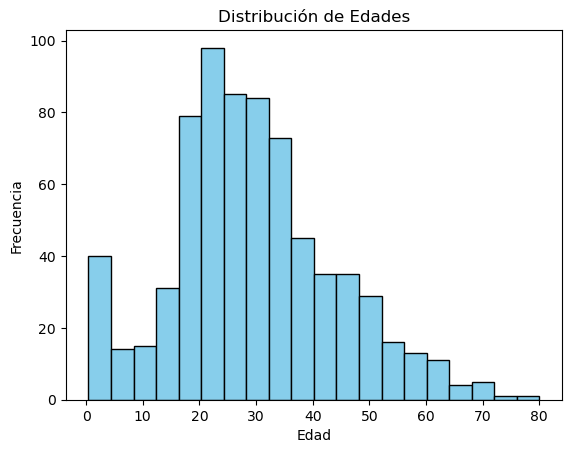

In [15]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Gráfico de la supervivencia

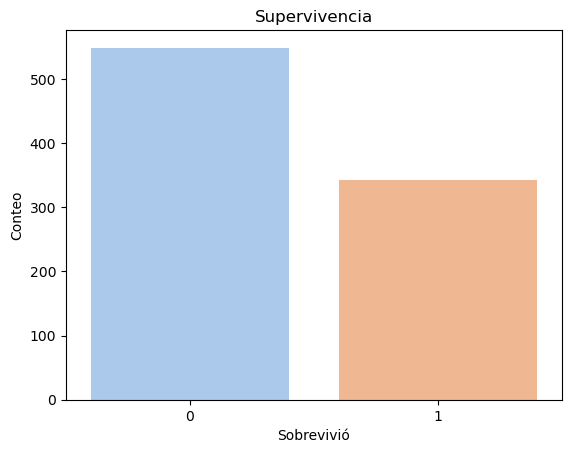

In [17]:
sns.countplot(x='Survived', data=df, palette='pastel', hue='Survived', legend=False)
plt.title('Supervivencia')
plt.xlabel('Sobrevivió')
plt.ylabel('Conteo')
plt.show()

## Matriz de correlación entre las variables numéricas

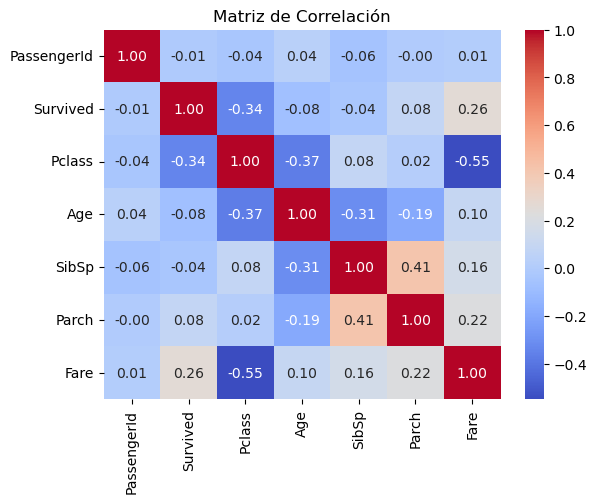

In [19]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr = numeric_df.corr()

# Crear el heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## Gráfico de la tasa de supervivencia por clase

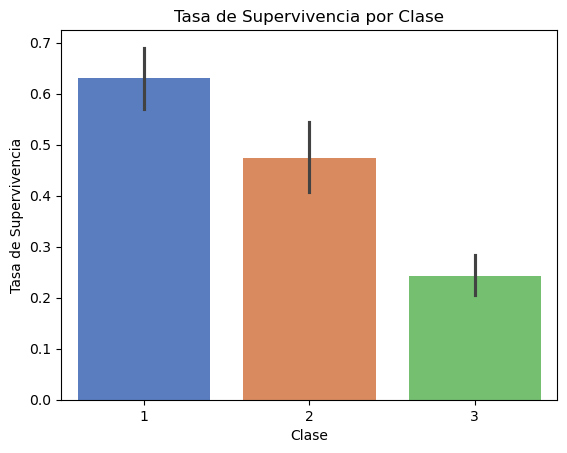

In [21]:
sns.barplot(x='Pclass', y='Survived', data=df, palette='muted', hue='Pclass', legend=False)
plt.title('Tasa de Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Tasa de Supervivencia')
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

## Llenar los valores nulos en 'Age' con la media

In [24]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

## Llenar los valores nulos en 'Embarked' con la moda

In [26]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## Eliminar la columna 'Cabin' ya que tiene muchos valores nulos

In [28]:
df.drop(columns=['Cabin'], inplace=True)

## Convertir las variables categóricas en variables numéricas

In [30]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

## Definir las variables independientes (X) y la variable dependiente (y)

In [33]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar el modelo configurando los diferentes hiperparámetros.

## Usar RandomForestClassifier para este ejemplo

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [40]:
y_pred = model.predict(X_test)
print("Reporte de Clasificasión :")
print(classification_report(y_test, y_pred))

Reporte de Clasificasión :
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [41]:
print("Matriz de Confusión :")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusión :
[[90 15]
 [19 55]]


# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

## Gráfico de la importancia de las características

In [44]:
feature_importances = model.feature_importances_
features = X.columns

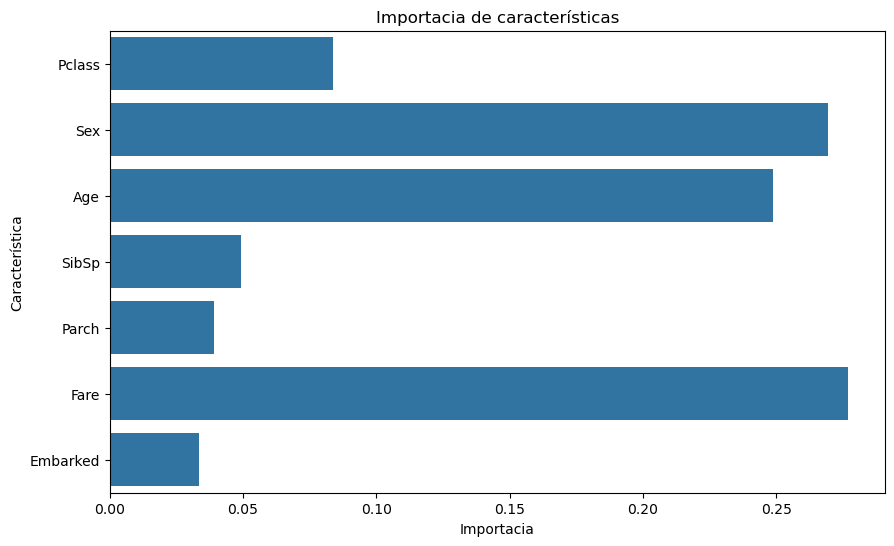

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Importacia de características')
plt.xlabel('Importacia')
plt.ylabel('Característica')
plt.show()

## Matriz de confusión

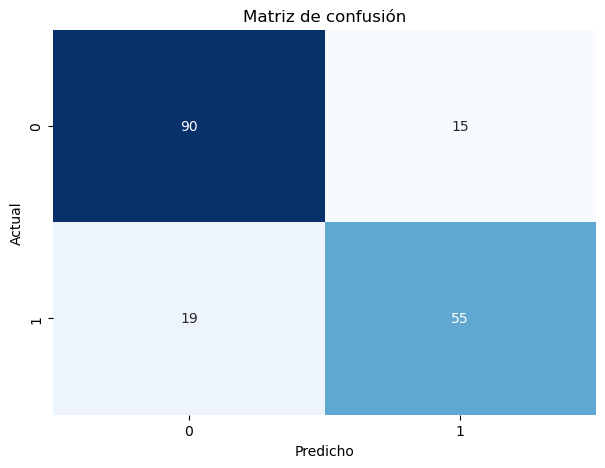

In [47]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos.

Para interpretar, analizar y documentar los resultados obtenidos, primero vamos a desglosar el **classification report** y la **confusion matrix**. Con esta información, podremos entender el desempeño del modelo. 

### 1. **Classification Report**

El **classification report** proporciona las siguientes métricas clave:

- **Precision**: 
  - Para la clase `0` (no sobrevivió), la precisión es **0.83**. Esto significa que el modelo predijo correctamente un 83% de las veces cuando dijo que no sobrevivió.
  - Para la clase `1` (sobrevivió), la precisión es **0.80**. Esto significa que el modelo predijo correctamente un 80% de las veces cuando dijo que sobrevivió.

- **Recall**: 
  - Para la clase `0` (no sobrevivió), el recall es **0.87**. Esto significa que el modelo detectó correctamente el 87% de las instancias que realmente no sobrevivieron.
  - Para la clase `1` (sobrevivió), el recall es **0.74**. Esto significa que el modelo detectó correctamente el 74% de las instancias que realmente sobrevivieron.

- **F1-Score**: 
  - Para la clase `0` (no sobrevivió), el F1-Score es **0.85**.
  - Para la clase `1` (sobrevivió), el F1-Score es **0.77**.

- **Accuracy**: la precisión global es **0.82**.

- **Macro Average**: Promedio de precisión, recall y F1-Score entre las clases. En este caso, el promedio macro es:
  - Precision: **0.81**
  - Recall: **0.80**
  - F1-Score: **0.81**

- **Weighted Average**: Promedio ponderado de precisión, recall y F1-Score, donde cada métrica se pondera por el número de instancias en cada clase. Los valores para el promedio ponderado son:
  - Precision: **0.81**
  - Recall: **0.82**
  - F1-Score: **0.81**

### 2. **Confusion Matrix**

La **matriz de confusión** permite evaluar el desempeño de un modelo de clasificación. En este caso:

\[
\begin{bmatrix}
91 & 14 \\
19 & 55 \\
\end{bmatrix}
\]

- **[91, 14]**: De las 105 instancias que realmente no sobrevivieron (clase `0`), el modelo predijo correctamente 91 como `0` (verdaderos negativos) y erróneamente predijo 14 como `1` (falsos positivos).
- **[19, 55]**: De las 74 instancias que realmente sobrevivieron (clase `1`), el modelo predijo incorrectamente 19 como `0` (falsos negativos) y correctamente predijo 55 como `1` (verdaderos positivos).

### 3. **Análisis**

#### **Rendimiento del modelo:**

- **Precision**: El modelo tiene una precisión razonablemente buena, especialmente para la clase `0` (no sobrevivió), con un 83% de precisión, lo que significa que es bastante confiable cuando predice que alguien no sobrevivió.
- **Recall**: El modelo tiene un recall más alto para la clase `0` (87%) que para la clase `1` (74%). Esto indica que el modelo es mejor para identificar correctamente a aquellos que no sobrevivieron, pero tiene un desempeño inferior al identificar a los que sobrevivieron.
- **F1-Score**: El F1-Score para la clase `0` (0.85) es relativamente alto, mientras que para la clase `1` (0.77) es un poco más bajo. Esto refleja el hecho de que el modelo tiene un mejor balance entre precisión y recall para la clase `0`.
- **Accuracy**: El **accuracy** global de 0.82 es un buen indicador de que el modelo está funcionando bien en general, pero esto podría verse influenciado por un desbalance en las clases (por ejemplo, más personas no sobrevivieron que sobrevivieron).

### Conclusión

El modelo Random Forest ha mostrado un buen rendimiento, especialmente para la clase `0` (no sobrevivió). Sin embargo, el modelo tiene espacio para mejorar en la predicción de la clase `1` (sobrevivió). A través de la optimización de parámetros y el manejo adecuado de un posible desbalance entre las clases, se podría mejorar aún más su desempeño.